<a href="https://colab.research.google.com/github/ozturkbusrada/Text-Classification-with-Naive-Bayes/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naive Bayes'in temel varsayımı kelimenin diğer özelliklerden veya kelimelerden bağımsız olduğudur. Bu nedenle, "naive" (saf) olarak adlandırılır. Bu varsayım, özellikler arasındaki bağımlılıkları görmezden gelir ve hesaplamaları basitleştirir.
Algoritma, her sınıf için özelliklerin koşullu olasılıklarını hesaplar ve bu olasılıkları kullanarak tahmin yapar.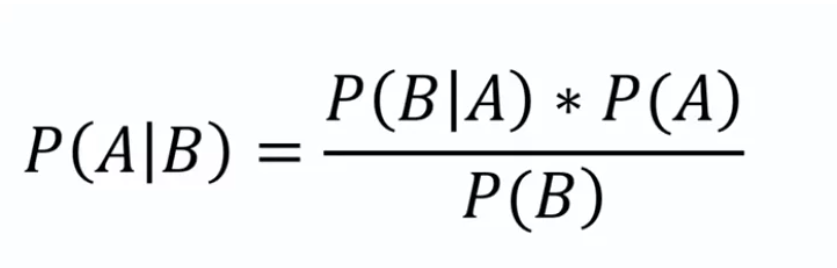


In [ ]:
 !pip install nltk

In [ ]:
!pip install  utils

In [ ]:
# stopwords = anlam taşımayan kelimeleri içeren veri kümesi
# twitter_samples = tweetlerin pozitif ve negatif duygularını içerir
import nltk
nltk.download('stopwords')
nltk.download('twitter_samples')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [ ]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [ ]:
def process_tweet(tweet):

    stemmer = PorterStemmer() #kelime kökleri için stemmer nesnesi oluşturuyoruz.
    stopwords_english = stopwords.words('english')

    tweet = re.sub(r'\$\w*', '', tweet)

    tweet = re.sub(r'^RT[\s]+', '', tweet)

    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    tweet = re.sub(r'#', '', tweet)
    # tweetleri tokenize ediyoruz
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = [] # tokenlara ayrılan kelimeleri kontrol ediyoruz.
    for word in tweet_tokens: # eğer abuk sabuk iaşretler yoksa ve stopwords kümesi içinde değilse işlenen kelimelerin yanına atıyoruz.
        if (word not in stopwords_english and
            word not in string.punctuation):

            stem_word = stemmer.stem(word)
            tweets_clean.append(stem_word)

    return tweets_clean

In [ ]:
def test_lookup(func): # bir tür frekans sözlüğü oluşturuluyor
    freqs = {('sad', 0): 4,
             ('happy', 1): 12,
             ('oppressed', 0): 7}
    word = 'happy' #aranan değişken
    label = 1 #aranan kelimenin etiketi
    if func(freqs, word, label) == 12:
        return 'SUCCESS!!'
    return 'Failed Sanity Check!'

In [ ]:
def lookup(freqs, word, label):

    n = 0  # lookup fonk. frekans sözlüğünde aranan kelimenin belirli bir etiketle kaç kez eşleştiğini bulmaya çalışıyor

    pair = (word, label)
    if (pair in freqs):
        n = freqs[pair]

    return n

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('twitter_samples')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [ ]:
!ls /usr/local/lib/python3.10/dist-packages/utils

bools.py  dates.py  dicts  enum.py  __init__.py  lists.py  math.py  objects.py	__pycache__


In [ ]:
!ls /usr/local/lib/python3.10/dist-packages/utils

bools.py  dates.py  dicts  enum.py  __init__.py  lists.py  math.py  objects.py	__pycache__


In [ ]:
import sys
print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython']


In [ ]:
!pip install utils

In [ ]:
nltk.download('stopwords')
nltk.download('twitter_samples')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [ ]:

import pdb
from nltk.corpus import stopwords, twitter_samples
import numpy as np
import pandas as pd
import nltk
import string
from nltk.tokenize import TweetTokenizer
from os import getcwd

In [ ]:
filePath = f"{getcwd()}/../tmp2/"
nltk.data.path.append(filePath)

In [ ]:
# get the sets of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')


test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg
test_x = test_pos + test_neg


train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

Process the data
-gürültüleri kaldırıyoruz

In [ ]:
custom_tweet = "RT @Twitter @chapagain Hello There! Have a great day. :) #good #morning http://chapagain.com.np"

# print cleaned tweet
print(process_tweet(custom_tweet))

['hello', 'great', 'day', ':)', 'good', 'morn']


In [ ]:

def count_tweets(result, tweets, ys):

    for y, tweet in zip(ys, tweets):
        for word in process_tweet(tweet):

            pair = (word,y)


            if pair in result:
                result[pair] += 1


            else:
                result[pair] = 1


    return result

In [ ]:
# Testing  function


result = {}
tweets = ['i am happy', 'i am tricked', 'i am sad', 'i am tired', 'i am tired']
ys = [1, 0, 0, 0, 0]
count_tweets(result, tweets, ys)

{('happi', 1): 1, ('trick', 0): 1, ('sad', 0): 1, ('tire', 0): 2}

Train Model using Naive Bayes

In [ ]:
# Build the freqs dictionary

freqs = count_tweets({}, train_x, train_y)

In [ ]:

def train_naive_bayes(freqs, train_x, train_y):


    loglikelihood = {}
    logprior = 0



    # calculate V, sözlükteki benzersiz kelimelerin sayısı
    vocab = set([pair[0] for pair in freqs.keys()])
    V = len(vocab)

    # calculate N_pos, N_neg, V_pos, V_neg
    N_pos = N_neg = V_pos = V_neg = 0
    for pair in freqs.keys():
        # eğer label pozitifse
        if pair[1] > 0:
            # benzersiz positive kelime sayısını 1 arttır
            V_pos += 1


            N_pos += freqs[pair]

        # else, label negatifse
        else:
            # benzersiz negatif kelime sayısını 1 arttır
            V_neg += 1


            N_neg += freqs[pair]

    # belge sayısını hesaplıyoruz
    D = len(train_y)

    # Calculate D_pos
    D_pos = (len(list(filter(lambda x: x > 0, train_y))))

    # Calculate D_neg
    D_neg = (len(list(filter(lambda x: x <= 0, train_y))))

    # Calculate logprior
    logprior = np.log(D_pos) - np.log(D_neg)


    for word in vocab:
        # get the positive and negative frequency of the word
        freq_pos = lookup(freqs,word,1)
        freq_neg = lookup(freqs,word,0)

        # calculate the probability that each word is positive, and negative
        p_w_pos = (freq_pos + 1) / (N_pos + V)
        p_w_neg = (freq_neg + 1) / (N_neg + V)

        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)

        # logprior = pozitif ve negatif tweetlerin veri setindeki oranına dayanır
        # log( P(Dpos) / P(Dneg)) = log ( Dpositive/Dnegative)
    return logprior, loglikelihood

In [ ]:
# naive bayes modelini eğitiyoruz
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)
print(logprior)
print(len(loglikelihood))

0.0
9085


 logprior 0.0 çıktı yani pozitif ve negatif tweetlerin veri setinde eşit sayıda demek.

 loglikelihood = 9085 ise train setindeki benzersiz kelimelerin toplam sayısı birazdan ona göre kendi verilerimizi sınıflandrıcaz

In [ ]:
# Şimdi bazı tweetleri test edeceğiz.
def naive_bayes_predict(tweet, logprior, loglikelihood):


    word_l = process_tweet(tweet)


    p = 0


    p += logprior

    for word in word_l:


        if word in loglikelihood:

            p += loglikelihood[word]



    return p

In [ ]:

my_tweet = 'She smiled.'
p = naive_bayes_predict(my_tweet, logprior, loglikelihood)
print('The expected output is', p)

The expected output is 1.5737244858565678


In [ ]:

def test_naive_bayes(test_x, test_y, logprior, loglikelihood):

    accuracy = 0


    y_hats = [] #sınıflandırma tahminlerini tutacak
    for tweet in test_x:
        # if the prediction is > 0
        if naive_bayes_predict(tweet, logprior, loglikelihood) > 0:
            # the predicted class is 1
            y_hat_i = 1
        else:
            # otherwise the predicted class is 0
            y_hat_i = 0

        # append the predicted class to the list y_hats
        y_hats.append(y_hat_i)


    error = np.mean(np.absolute(y_hats-test_y))


    accuracy = 1-error



    return accuracy


In [ ]:
print("Naive Bayes accuracy = %0.4f" %
      (test_naive_bayes(test_x, test_y, logprior, loglikelihood)))

Naive Bayes accuracy = 0.9940


In [ ]:

for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:

    p = naive_bayes_predict(tweet, logprior, loglikelihood)

    print(f'{tweet} -> {p:.2f}')

I am happy -> 2.15
I am bad -> -1.29
this movie should have been great. -> 2.14
great -> 2.14
great great -> 4.28
great great great -> 6.41
great great great great -> 8.55


In [ ]:
# istediğimiz bir tweet girelim ve kontrol edelim
my_tweet = 'Alev Taskin is smiling this morning'
naive_bayes_predict(my_tweet, logprior, loglikelihood)

-8.80222939347889

In [ ]:
# kelimelerin duyarlılığını ölçmek için frekans oranını buluyoruz.
def get_ratio(freqs, word):

    pos_neg_ratio = {'positive': 0, 'negative': 0, 'ratio': 0.0}

    # use lookup() to find positive counts for the word (denoted by the integer 1)
    pos_neg_ratio['positive'] = lookup(freqs,word,1)

    # use lookup() to find negative counts for the word (denoted by integer 0)
    pos_neg_ratio['negative'] = lookup(freqs,word,0)

    # calculate the ratio of positive to negative counts for the word
    pos_neg_ratio['ratio'] = (pos_neg_ratio['positive'] + 1)/(pos_neg_ratio['negative'] + 1)

    return pos_neg_ratio

In [ ]:
get_ratio(freqs, 'happi')

{'positive': 161, 'negative': 18, 'ratio': 8.526315789473685}

In [ ]:
#frekans sözlüğündeki kelimeleri bir eşik değeri kullanarak filtrelemek için kullanılır
def get_words_by_threshold(freqs, label, threshold):

    word_list = {}


    for key in freqs.keys():
        word, _ = key


        pos_neg_ratio = get_ratio(freqs, word)


        if label == 1 and pos_neg_ratio['ratio'] >= threshold :


            word_list[word] = pos_neg_ratio


        elif label == 0 and pos_neg_ratio['ratio'] <= threshold:

            word_list[word] = pos_neg_ratio




    return word_list

In [ ]:
# eşikteki veya altındaki negatif kelimeleri bulalım
get_words_by_threshold(freqs, label=0, threshold=0.05)

{':(': {'positive': 1, 'negative': 3663, 'ratio': 0.0005458515283842794},
 ':-(': {'positive': 0, 'negative': 378, 'ratio': 0.002638522427440633},
 'zayniscomingbackonjuli': {'positive': 0, 'negative': 19, 'ratio': 0.05},
 '26': {'positive': 0, 'negative': 20, 'ratio': 0.047619047619047616},
 '>:(': {'positive': 0, 'negative': 43, 'ratio': 0.022727272727272728},
 'lost': {'positive': 0, 'negative': 19, 'ratio': 0.05},
 '♛': {'positive': 0, 'negative': 210, 'ratio': 0.004739336492890996},
 '》': {'positive': 0, 'negative': 210, 'ratio': 0.004739336492890996},
 'beli̇ev': {'positive': 0, 'negative': 35, 'ratio': 0.027777777777777776},
 'wi̇ll': {'positive': 0, 'negative': 35, 'ratio': 0.027777777777777776},
 'justi̇n': {'positive': 0, 'negative': 35, 'ratio': 0.027777777777777776},
 'ｓｅｅ': {'positive': 0, 'negative': 35, 'ratio': 0.027777777777777776},
 'ｍｅ': {'positive': 0, 'negative': 35, 'ratio': 0.027777777777777776}}

In [ ]:
# pozitif kelimelere bakalım şimdi de
get_words_by_threshold(freqs, label=1, threshold=10)

{'followfriday': {'positive': 23, 'negative': 0, 'ratio': 24.0},
 'commun': {'positive': 27, 'negative': 1, 'ratio': 14.0},
 ':)': {'positive': 2847, 'negative': 2, 'ratio': 949.3333333333334},
 'flipkartfashionfriday': {'positive': 16, 'negative': 0, 'ratio': 17.0},
 ':d': {'positive': 498, 'negative': 0, 'ratio': 499.0},
 ':p': {'positive': 104, 'negative': 0, 'ratio': 105.0},
 'influenc': {'positive': 16, 'negative': 0, 'ratio': 17.0},
 ':-)': {'positive': 543, 'negative': 0, 'ratio': 544.0},
 "here'": {'positive': 20, 'negative': 0, 'ratio': 21.0},
 'youth': {'positive': 14, 'negative': 0, 'ratio': 15.0},
 'bam': {'positive': 44, 'negative': 0, 'ratio': 45.0},
 'warsaw': {'positive': 44, 'negative': 0, 'ratio': 45.0},
 'shout': {'positive': 11, 'negative': 0, 'ratio': 12.0},
 ';)': {'positive': 22, 'negative': 0, 'ratio': 23.0},
 'stat': {'positive': 51, 'negative': 0, 'ratio': 52.0},
 'arriv': {'positive': 57, 'negative': 4, 'ratio': 11.6},
 'via': {'positive': 60, 'negative': 1, 

In [ ]:
# error analysis
print('Truth Predicted Tweet')
for x, y in zip(test_x, test_y):
    y_hat = naive_bayes_predict(x, logprior, loglikelihood)
    if y != (np.sign(y_hat) > 0):
        print('%d\t%0.2f\t%s' % (y, np.sign(y_hat) > 0, ' '.join(
            process_tweet(x)).encode('ascii', 'ignore')))

Truth Predicted Tweet
1	0.00	b''
1	0.00	b'truli later move know queen bee upward bound movingonup'
1	0.00	b'new report talk burn calori cold work harder warm feel better weather :p'
1	0.00	b'harri niall 94 harri born ik stupid wanna chang :d'
1	0.00	b''
1	0.00	b''
1	0.00	b'park get sunlight'
1	0.00	b'uff itna miss karhi thi ap :p'
0	1.00	b'hello info possibl interest jonatha close join beti :( great'
0	1.00	b'u prob fun david'
0	1.00	b'pat jay'
0	1.00	b'whatev stil l young >:-('


In [ ]:

my_tweet = 'I am happy because I am learning :)'

p = naive_bayes_predict(my_tweet, logprior, loglikelihood)
print(p)

9.57385883169329


In [ ]:
my_tweet = 'I am happy because I love my job :)'

p = naive_bayes_predict(my_tweet, logprior, loglikelihood)
print(p)

8.426456378855748
